## Fhasion Mnist

En el siguiente [link](https://github.com/zalandoresearch/fashion-mnist) se puede encontrar información acerca del dataset que se utiliza en este caso práctico.

In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images,
                               test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [3]:
# Output: (60000, 28, 28)
train_images.shape

(60000, 28, 28)

In [4]:
# Output: 60000
len(train_labels)

60000

In [5]:
# Output: (10000, 28, 28)
test_images.shape

(10000, 28, 28)

In [6]:
# Output: 10000
len(test_labels)

10000

In [7]:
# Output: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

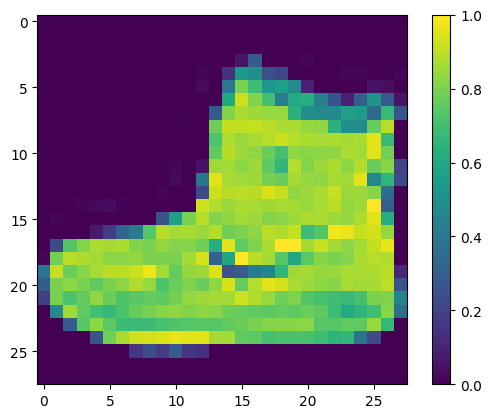

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.fit(train_images, train_labels, batch_size=6000, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/10
10/10 [==============================] - 1s 39ms/step - loss: 1.3432 - accuracy: 0.5490
Epoch 2/10
10/10 [==============================] - 0s 39ms/step - loss: 0.7014 - accuracy: 0.7588
Epoch 3/10
10/10 [==============================] - 0s 40ms/step - loss: 0.5853 - accuracy: 0.8035
Epoch 4/10
10/10 [==============================] - 0s 41ms/step - loss: 0.5253 - accuracy: 0.8219
Epoch 5/10
10/10 [==============================] - 0s 40ms/step - loss: 0.4880 - accuracy: 0.8336
Epoch 6/10
10/10 [==============================] - 0s 39ms/step - loss: 0.4619 - accuracy: 0.8436
Epoch 7/10
10/10 [==============================] - 0s 40ms/step - loss: 0.4426 - accuracy: 0.8499
Epoch 8/10
10/10 [==============================] - 0s 39ms/step - loss: 0.4275 - accuracy: 0.8534
Epoch 9/10
10/10 [==============================] - 0s 38ms/step - loss: 0.4160 - accuracy: 0.8569
Epoch 10/10
10/10 [==============================] - 0s 36ms/step - loss: 0.4025 - accuracy: 0.8619

Test los

In [12]:
predictions = model.predict(test_images)
np.argmax(predictions[1])

313/313 [==============================] - 0s 987us/step


2

In [13]:
test_labels[1]

2

In [14]:
model.save('model/fashion_mnist')

INFO:tensorflow:Assets written to: model/fashion_mnist\assets


INFO:tensorflow:Assets written to: model/fashion_mnist\assets
